## Final Project Submission

Please fill out:
* Student name: Andrew Levinton
* Student pace: part time 
* Scheduled project review date/time: 12/05/2022
* Instructor name: Joe Comeaux
* Blog post URL: https://github.com/andrewkoji/Phase-1-Project---Movie-Analysis.git


## Phase 1 Project

## Business Problem

This project aims at finding the best movies to produce for Microsoft.

## Overview

In this analysis, the following will be analyzed and used as measurements of success:
- Gross Profit
- Gross Revenue
- Net Profit
- Overalll rating
- Overall reviews

To observe these measurements and make conclusions, an exploratory data analysis will be done on the datasets imported below. The analysis will help to provide key insight on the most essential aspects that make a successful movie. 

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
cd zippedData

C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_1\Phase_1_Project\Phase-1-Project---Movie-Analysis\zippedData


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is A24A-7E70

 Directory of C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_1\Phase_1_Project\Phase-1-Project---Movie-Analysis\zippedData

11/28/2022  04:42 PM    <DIR>          .
12/10/2022  06:58 PM    <DIR>          ..
11/22/2022  11:31 PM    <DIR>          .ipynb_checkpoints
11/28/2022  07:26 PM            34,071 Bar Chart Rev vs Rating.jpeg
12/08/2022  08:12 PM            50,536 Bar_chart_month_profit.jpeg
11/22/2022  11:28 PM            53,544 bom.movie_gross.csv.gz
11/28/2022  04:42 PM                 0 im.db
12/08/2022  08:12 PM            68,160 production_budget_vs_net_profit.jpeg
11/23/2022  03:57 PM            68,866 Profit_by_Genre.jpeg
12/08/2022  08:12 PM            80,086 Revenue by Genre.jpeg
12/08/2022  08:12 PM            56,156 Revenue by Month.jpeg
11/22/2022  11:28 PM           498,202 rt.movie_info.tsv.gz
11/22/2022  11:28 PM         3,402,194 rt.reviews.tsv.gz
11/22/2022  11:28

## The Data

In [4]:
#The Movie DataBase
tmdb = pd.read_csv('tmdb.movies.csv.gz')

#Box Office Movies
bom = pd.read_csv('bom.movie_gross.csv.gz')

#Rotten Tomatoes Reviews
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')

#Rotten Tomatoes Movie Info
rt_info = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')

#The Numbers Movie Budgets
budgets = pd.read_csv('tn.movie_budgets.csv.gz')

In [5]:
print(('Length of The Movie Database: {}'.format(len(tmdb))))
print('Length of Box Office Movies: {}'.format(len(bom)))
print('Length of Rotten Tomatoes Reviews: {}'.format(len(rt_reviews)))
print('Length of Rotten Tomatoes Movie Info: {}'.format(len(rt_info)))
print('Length of The Numbers Movie Budgets: {}'.format(len(budgets)))


Length of The Movie Database: 26517
Length of Box Office Movies: 3387
Length of Rotten Tomatoes Reviews: 54432
Length of Rotten Tomatoes Movie Info: 1560
Length of The Numbers Movie Budgets: 5782


The libraries above are the datasets that will be cleaned and analyzed for the analysis. 

## Getting Rating Data From Rotten Tomatoes

# Cleaning the Review Data

## Merging Tomato Data

In [6]:
rt = pd.merge(rt_reviews,rt_info,on='id')


In [7]:
print(len(rt_reviews))
print(len(rt_info))
print(len(rt))

54432
1560
54432


## Getting Genre Data

In [8]:
#check nulls, length
rt.isnull().sum()

id                  0
review           5563
rating_x        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
synopsis          132
rating_y           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
dtype: int64

In [9]:
# Dropping nulls from ratings and Genre
rt = rt[rt['rating_x'].notnull()]
rt = rt[rt['box_office'].notnull()]
#Changing box office revenue so it can be read numerically
rt['box_office'] = rt['box_office'].str.replace(',','').apply(lambda x: int(x))
#split the genre(eg. Action|Drama become -> [Action, Drama])
rt['genre'] = rt['genre'].str.split('|')

## Checking length after nulls are dropped

In [10]:
len(rt)

25538

In [11]:
#explode genre column so each value within the list has its own row. this will make it easier to use groupby for an analysis
genre = rt.explode('genre')
#rename columns
genre = genre.rename(columns={'box_office':'box_office_revenue'})
genre = genre.rename(columns={'rating_x':'rating'})

In [12]:
len(genre)

54672

## Over what time period does this data exist?

In [13]:
genre['year'] = genre['theater_date'].astype(str).apply(lambda x: x[-4:]).astype(float)

In [14]:
'The data exists from the year {} to {}'.format(int(min(genre['year'])), int(max(genre['year'])))

'The data exists from the year 1958 to 2018'

## Box Office Revenue by Genre

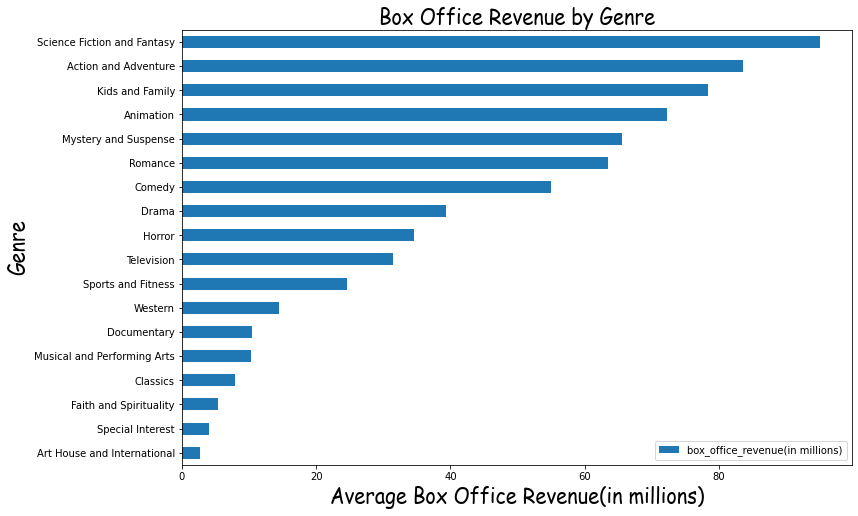

In [15]:
#format x-values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#define fonts that can be used for all the graphs
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}


#group by genre
genre_revenue = genre.groupby('genre')['box_office_revenue'].mean().reset_index()
#convert to millions 
genre_revenue['box_office_revenue(in millions)'] = genre_revenue['box_office_revenue'] / 1000000

genre_revenue = genre_revenue.sort_values('box_office_revenue(in millions)')
#create bar graph of box office revenue by genre
genre_revenue.plot(x='genre',y='box_office_revenue(in millions)',kind='barh',figsize=(12,8))
plt.title('Box Office Revenue by Genre', size=20, **csfont)
plt.xlabel('Average Box Office Revenue(in millions)',size=20, **csfont)
plt.ylabel('Genre',size=20,**csfont)
# plt.show()
plt.savefig("Revenue by Genre.jpeg",bbox_inches='tight') #save as jpg

In the graph above, it is shown that Science Fiction and Fantasy along with Action and Adventure appear to yield the highest average box office revenue, with Animation, Mystery/Suspense and Romance being the next top 3 performers. As animation improves
with innovative technology, it is clear that the more popular movies does lead to a higher turnout at the box office as they are the genres that apply the most to the masses. 

## Which Movie Rating Attracts the Most Revenue?

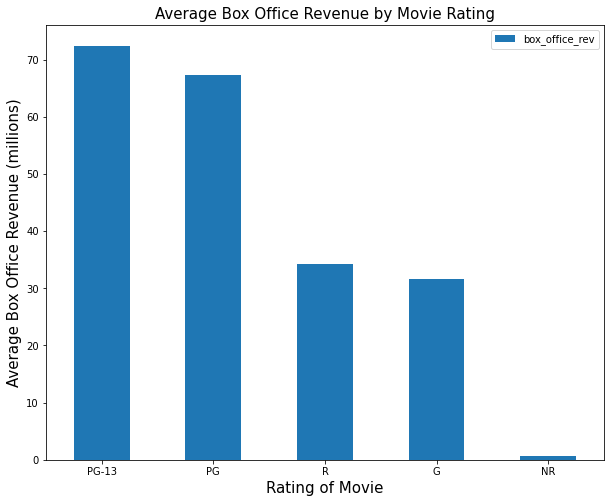

In [16]:
#getting average revenue by rating
rating_movie = rt.groupby('rating_y')['box_office'].mean().reset_index()

#converting to millions
rating_movie['box_office_rev'] = rating_movie['box_office'] / 1000000

rating_movie = rating_movie.sort_values('box_office_rev', ascending=False)
#bar graph of movie rating vs the box office revenue
rating_movie.plot(x='rating_y',y='box_office_rev',kind='bar',figsize=(10,8))
plt.ylabel('Average Box Office Revenue (millions)',size=15)
plt.xlabel('Rating of Movie',size=15)
plt.xticks(rotation=0)
plt.title('Average Box Office Revenue by Movie Rating',size=15)
# plt.savefig('Bar Chart Rev vs Rating.jpeg')
plt.show()

## What are the top 10 directors in terms of box office revenue?

In [17]:
#using same method for genres to develop average revenue by director
directors = rt[['director','box_office']].drop_duplicates()

directors['director'] = directors['director'].str.split('|')
directors = directors.explode('director')

In [18]:
#top 10 directors by box office revenue
directors.sort_values('box_office', ascending=False).head(10)

,director,box_office
26581,Mel Gibson,368000000
28440,Peter Jackson,303001229
39981,Sam Mendes,299300000
21985,Jay Roach,279167575
36952,Chris Columbus,261835892
16183,Joel Zwick,241250669
20799,Steven Spielberg,234141872
50317,Peter Berg,227946274
45878,Justin Lin,209805005
41852,Andy Tennant,177575142


## Average Rating by Genre

In [19]:
#import review data
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t',encoding=('ISO-8859-1'),low_memory =False)

#filter by top critics
rt_reviews = rt_reviews[rt_reviews['top_critic'] == 1]

#change all "Letter Grade" ratings to a %
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
rt_reviews['rating'] = rt_reviews['rating'].apply(lambda x:\
                                                  '100' if 'A+' in x\
                                                  else '98' if 'A' in x\
                                                  else '95' if 'A-' in x\
                                                  else '88' if 'B+' in x\
                                                  else '85' if 'B' in x\
                                                  else '80' if 'B-' in x\
                                                  else '78' if 'C+' in x\
                                                  else '75' if 'C' in x\
                                                  else '70' if 'C-' in x\
                                                  else '68' if 'D+' in x\
                                                  else '65' if 'D' in x\
                                                  else '60' if 'D-' in x\
                                                  else '50' if 'F' in x\
                                                  else '45' if 'N' in x\
                                                  else '40' if 'R' in x else x)
#change all "fractional" reviews to %
rt_reviews['rating'] = rt_reviews['rating'].str.split('/').apply(lambda x: (float(x[0]) / float(x[1])) * 100\
                                                  if (len(x) > 1 and float(x[1]) != 0)\
                                                  else float(x[0]))
#some reviews were over 100% because te reviews had improper fractions(eg. 2.1/2). They were converted to 100
rt_reviews['rating'] = rt_reviews['rating'].apply(lambda x: 100 if x > 100 else x)
rt_reviews = rt_reviews.sort_values('rating', ascending=False)


In [20]:
merged = pd.merge(rt_reviews,rt_info,on='id')


In [21]:
# Dropping nulls from ratings and Genre
merged = merged[merged['rating_x'].notnull()]
merged = merged[merged['box_office'].notnull()]
#Changing box office revenue so it can be read numerically
merged['box_office'] = merged['box_office'].str.replace(',','').apply(lambda x: int(x))
#split the genre(eg. Action|Drama become -> [Action, Drama])
merged['genre'] = merged['genre'].str.split('|')

In [22]:
#explode genre column so each value within the list has its own row. this will make it easier to use groupby for an analysis
genre = merged.explode('genre')
#rename columns
genre = genre.rename(columns={'box_office':'box_office_revenue'})
genre = genre.rename(columns={'rating_x':'rating'})

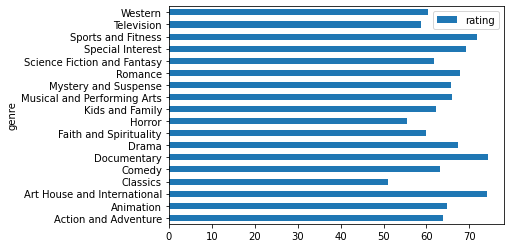

In [23]:
genre_rating = genre.groupby('genre')['rating'].mean().reset_index()
ax = genre_rating.plot(x='genre',y='rating',kind='barh')
plt.show()

As shown above, there is no conclusive genre that yields a significantly higher rating. My advice on this front would be to simply not consider reviews when picking a genre. 

## Box Office Revenue by month

In [24]:
#stripping month number from dates
rt['release_month'] = rt['theater_date'].astype(str).apply(lambda x: x[0:3])

In [25]:
#group by month
monthly = rt.groupby('release_month')['box_office'].mean().reset_index()

In [26]:
monthly = monthly[0:12]

In [27]:
#function to format month name
monthly['release_month'] = monthly['release_month'].apply(lambda x: 'January' if x=='Jan'\
                                                         else 'February' if x=='Feb'\
                                                         else 'March' if x=='Mar'\
                                                         else 'April' if x=='Apr'\
                                                         else 'May' if x=='May'\
                                                         else 'June' if x=='Jun'\
                                                         else 'July' if x=='Jul'\
                                                         else 'August' if x=='Aug'\
                                                         else 'September' if x=='Sep'\
                                                         else 'October' if x=='Oct'\
                                                         else 'November' if x=='Nov'\
                                                         else 'December' if x=='Dec'\
                                                         else x)

In [28]:
#assigning number to each month to order them
monthly['month_no'] = monthly['release_month'].apply(lambda x: 1 if x=='January'\
                                                         else 2 if x=='February'\
                                                         else 3 if x=='March'\
                                                         else 4 if x=='April'\
                                                         else 5 if x=='May'\
                                                         else 6 if x=='June'\
                                                         else 7 if x=='July'\
                                                         else 8 if x=='August'\
                                                         else 9 if x=='September'\
                                                         else 10 if x=='October'\
                                                         else 11 if x=='November'\
                                                         else 12 if x=='December'\
                                                         else x)

The chart shows more significant revenue during the months of November and December, as well as June and also February. What is surprising is the revenue during May, which is expected to be higher due to "Star Wars Day" on May 4th.


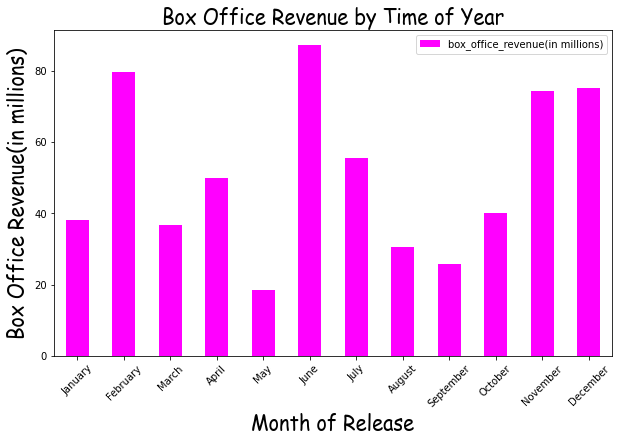

In [29]:
#sort dataframe by month
monthly = monthly.sort_values('month_no')
#convert to millions
monthly['box_office_revenue(in millions)'] = monthly['box_office'] / 1000000


#create graph of box office revenue by month
monthly.plot(x='release_month',y='box_office_revenue(in millions)',kind='bar',color='magenta',figsize=(10,6))

plt.title('Box Office Revenue by Time of Year', size=20, **csfont)
plt.ylabel('Box Office Revenue(in millions)',size=20, **csfont)
plt.xlabel('Month of Release',size=20,**csfont)
plt.xticks(rotation = 45)
# plt.show()
plt.savefig("Revenue by Month.jpeg",bbox_inches='tight') #save as jpg


print('The chart shows more significant revenue during the months of November and December, as well as June and also February. What is surprising is the revenue during May, which is expected to be higher due to "Star Wars Day" on May 4th.')

The chart shows more significant revenue during the months of November and December, as well as June and also February. What is surprising is the revenue during May, which is expected to be higher due to "Star Wars Day" on May 4th. 

## Using Budgets Dataframe to check profit

## Over what time period does the data exist?

In [30]:
budgets['year'] = budgets['release_date'].astype(str).apply(lambda x: x[-4:]).astype(int)

In [31]:
'The data exists from the year {} to {}'.format(int(min(budgets['year'])), int(max(budgets['year'])))

'The data exists from the year 1915 to 2020'

In [32]:
budgets = pd.read_csv('tn.movie_budgets.csv.gz')

#formatting 'gross' strings and the production budget so they can be converted to numeric values
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace("$","").str.replace(",","").astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","").str.replace(",","").astype(float)
budgets['production_budget'] = budgets['production_budget'].str.replace("$","").str.replace(",","").astype(float)

#calculating the total gross
budgets['total_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross']

#converting to billions
budgets['profit(in millions)'] = (budgets['total_gross'] - budgets['production_budget']) / 1000000

#slicing month number
budgets['month'] = budgets['release_date'].apply(lambda x: x[0:3])
#slicing year number
budgets['year'] = budgets['release_date'].apply(lambda x: x[-4:])


#formatting month names
budgets['month'] = budgets['month'].apply(lambda x: 'January' if x=='Jan'\
                                                         else 'February' if x=='Feb'\
                                                         else 'March' if x=='Mar'\
                                                         else 'April' if x=='Apr'\
                                                         else 'May' if x=='May'\
                                                         else 'June' if x=='Jun'\
                                                         else 'July' if x=='Jul'\
                                                         else 'August' if x=='Aug'\
                                                         else 'September' if x=='Sep'\
                                                         else 'October' if x=='Oct'\
                                                         else 'November' if x=='Nov'\
                                                         else 'December' if x=='Dec'\
                                                         else x)

#quick reformat to make nicer names to plot
budgets['budget'] = budgets['production_budget'] / 1000000
budgets['profit'] = budgets['profit(in millions)']
budgets['total_gross(in millions)'] = budgets['total_gross']  / 1000000
budgets['% of budget'] = (budgets['profit'] / budgets['budget'])*100

In [33]:
#grouping dataframe by month and average profit per month
monthly = budgets.groupby('month')['profit(in millions)'].mean().reset_index()

#assigning month number to sort the months
monthly['month_no'] = monthly['month'].apply(lambda x: 1 if x=='January'\
                                                         else 2 if x=='February'\
                                                         else 3 if x=='March'\
                                                         else 4 if x=='April'\
                                                         else 5 if x=='May'\
                                                         else 6 if x=='June'\
                                                         else 7 if x=='July'\
                                                         else 8 if x=='August'\
                                                         else 9 if x=='September'\
                                                         else 10 if x=='October'\
                                                         else 11 if x=='November'\
                                                         else 12 if x=='December'\
                                                         else x)

#sort by month number
monthly = monthly.sort_values('month_no')

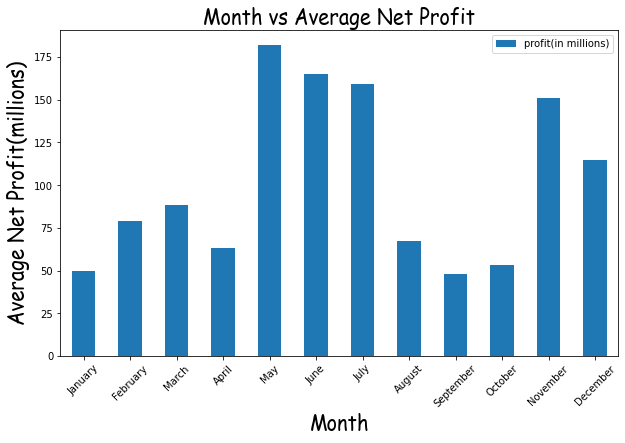

In [34]:
#create bar chart for average profit by month
monthly.plot(x='month',y='profit(in millions)', kind='bar',figsize=(10,6))
plt.title('Month vs Average Net Profit', size=20, **csfont)
plt.ylabel('Average Net Profit(millions)',size=20, **csfont)
plt.xlabel('Month',size=20,**csfont)
plt.xticks(rotation = 45)
plt.savefig("Bar_chart_month_profit.jpeg",bbox_inches='tight') #save as jpg

As shown in the chart below, the average return on the movies budget by month tells a different story compared to the       average profit. This metric is a normalized way to look at success of the movie. The return on budget is shown to be fairly consistent by month other than the month of June, which is a summer month(historically a good season for movies).


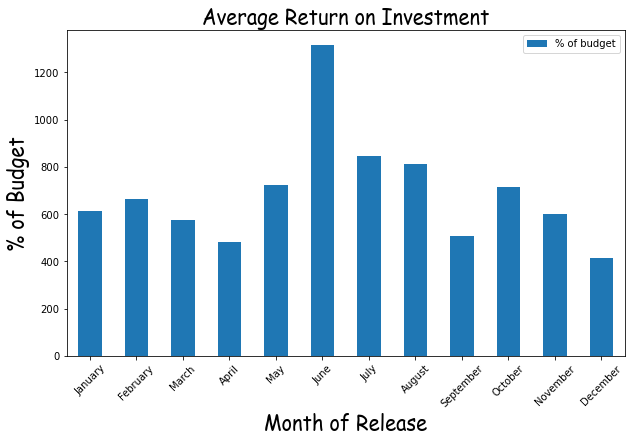

In [35]:
#create bar chart for average profit by month
#assigning month number to sort the months
monthly_per = budgets.groupby('month')['% of budget'].mean().reset_index()

monthly_per['month_no'] = monthly_per['month'].apply(lambda x: 1 if x=='January'\
                                                         else 2 if x=='February'\
                                                         else 3 if x=='March'\
                                                         else 4 if x=='April'\
                                                         else 5 if x=='May'\
                                                         else 6 if x=='June'\
                                                         else 7 if x=='July'\
                                                         else 8 if x=='August'\
                                                         else 9 if x=='September'\
                                                         else 10 if x=='October'\
                                                         else 11 if x=='November'\
                                                         else 12 if x=='December'\
                                                         else x)
monthly_per = monthly_per.sort_values('month_no')

monthly_per.plot(x='month',y='% of budget', kind='bar',figsize=(10,6))
plt.title('Average Return on Investment', size=20, **csfont)
plt.ylabel('% of Budget',size=20, **csfont)
plt.xlabel('Month of Release',size=20,**csfont)
plt.xticks(rotation=45)
plt.savefig("Bar_chart_month_profit.jpeg",bbox_inches='tight') #save as jpg

print('As shown in the chart below, the average return on the movies budget by month tells a different story compared to the       average profit. This metric is a normalized way to look at success of the movie. The return on budget is shown to be fairly consistent by month other than the month of June, which is a summer month(historically a good season for movies).')

## If you have a larger budget, will that lead to a higher profit?

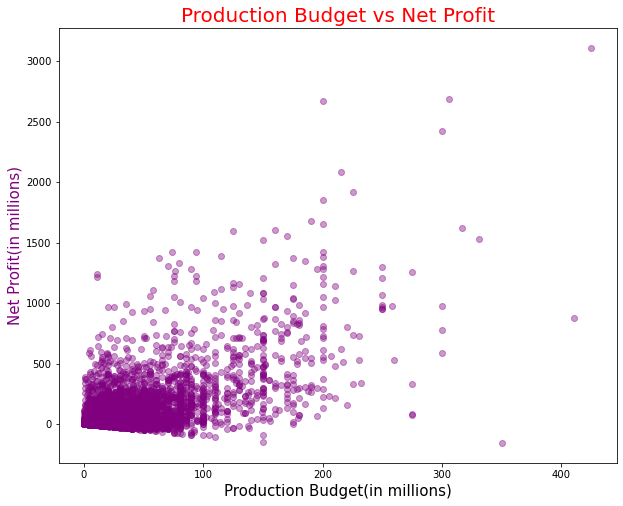

The Correlation Coefficient is: 0.6435798749670008.This is a sign that the budget has a positive, but weak correlation to     profit of the film. With a weak correlation, it makes sense to try keeping the budget low as it is where the highest            concentration of the data is.


In [36]:
#scatter plot of budget vs net profit
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.scatter(x=budgets['budget'], y=budgets['profit'], color='purple',alpha=0.4)

ax1.set_title('Production Budget vs Net Profit',size=20,color='r')
ax1.set_xlabel('Production Budget(in millions)',size=15)
ax1.set_ylabel('Net Profit(in millions)', color='purple',size=15)

## Correlation coefficient - line of regression
budget_profit_corr = budgets['budget'].corr(budgets['profit'])
# plt.show()
plt.savefig('production_budget_vs_net_profit.jpeg',bbox_inches='tight')

plt.show()

print("The Correlation Coefficient is: {}.This is a sign that the budget has a positive, but\
 weak correlation to     profit of the film. With a weak correlation, it makes sense to try\
 keeping the budget low as it is where the highest \
           concentration of the data is.".format(budget_profit_corr))

In [37]:
budgets['total gross(billions)'] = budgets['total_gross'] / 1000000000

In [38]:
budget_gross_corr = budgets['total gross(billions)'].corr(budgets['budget'])
budget_gross_corr

0.7399121495609373

The Correlation Coefficient is: 0.7399121495609373.This is a sign that the budget has a positive, but weak-medium           correlation to gross revenue of the film. With a medium correlation, it makes sense to try keeping the budget low as it is  where the highest concentration of the data is. The risk with a higher budget does appear to be too high as it grows.


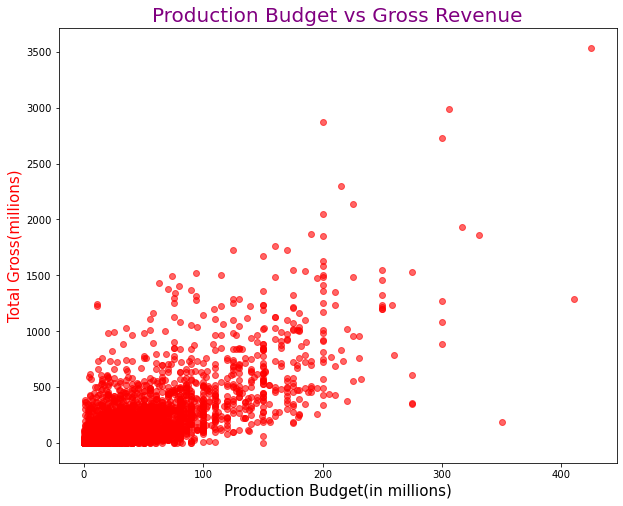

In [39]:
# Making a regression line based on the correlation

#plot
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.scatter(x=budgets['budget'], y=budgets['total_gross(in millions)'], color='r',alpha=0.6)
ax1.set_title('Production Budget vs Gross Revenue',size=20,color='purple')
ax1.set_xlabel('Production Budget(in millions)',size=15)
ax1.set_ylabel('Total Gross(millions)', color='r',size=15)


# plt.show()
plt.savefig('production_budget_vs_net_profit.jpeg',bbox_inches='tight')


print("The Correlation Coefficient is: {}.This is a sign that the budget has a positive, but\
 weak-medium           correlation to gross revenue of the film. With a medium correlation, it makes sense to try\
 keeping the budget low as it is  where the highest concentration of the data is. The risk with a higher\
 budget does appear to be too high as it grows.".format(budget_gross_corr))

In [40]:
cd ..

C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_1\Phase_1_Project\Phase-1-Project---Movie-Analysis


## IMDB data analysis based on genre

Querying the movie_basics and movie_ratings

In [41]:
import sqlite3 as sql

conn = sql.connect('im.db')
df = pd.read_sql('''SELECT * 
                FROM movie_basics
                JOIN movie_ratings
                USING(movie_id)
                JOIN movie_akas
                USING(movie_id)
                ORDER BY numvotes DESC
                ''', conn)

In [42]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt1375666,Inception,Inception,2010,148.000,"Action,Adventure,Sci-Fi",8.800,1841066,1,El origen,PE,None,imdbDisplay,None,0.000
1,tt1375666,Inception,Inception,2010,148.000,"Action,Adventure,Sci-Fi",8.800,1841066,2,Dasatskisi,GE,None,imdbDisplay,None,0.000
2,tt1375666,Inception,Inception,2010,148.000,"Action,Adventure,Sci-Fi",8.800,1841066,3,Talghin,IR,fa,imdbDisplay,None,0.000
3,tt1375666,Inception,Inception,2010,148.000,"Action,Adventure,Sci-Fi",8.800,1841066,4,Inception,GB,None,imdbDisplay,None,0.000
4,tt1375666,Inception,Inception,2010,148.000,"Action,Adventure,Sci-Fi",8.800,1841066,5,El origen,AR,None,None,None,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9899880,Columbus,Columbus,2018,85.000,Comedy,5.800,5,1,Columbus,None,None,original,None,1.000
261802,tt9899880,Columbus,Columbus,2018,85.000,Comedy,5.800,5,2,Colombos,IR,fa,imdbDisplay,None,0.000
261803,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.000,"Comedy,Horror",9.200,5,1,BADMEN with a good behavior,DE,None,None,None,0.000
261804,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.000,"Comedy,Horror",9.200,5,2,"Benimm dich, oder sie vertrimm'n dich!",DE,None,alternative,None,0.000


## Merge with budgets dataframe

In [43]:
imdb_budgets = pd.merge(df,budgets,left_on='original_title',right_on='movie',how='inner')
len(imdb_budgets)

43969

## Checking Profit by Genre

In [44]:
imdb_budgets['genres'] = imdb_budgets['genres'].str.split(',')
imdb_budgets_genres = imdb_budgets.explode('genres')
imdb_budgets_genres

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,...,worldwide_gross,total_gross,profit(in millions),month,year,budget,profit,total_gross(in millions),% of budget,total gross(billions)
0,tt1375666,Inception,Inception,2010,148.000,Action,8.800,1841066,1,El origen,...,835524642.000,1128100837.000,968.101,July,2010,160.000,968.101,1128.101,605.063,1.128
0,tt1375666,Inception,Inception,2010,148.000,Adventure,8.800,1841066,1,El origen,...,835524642.000,1128100837.000,968.101,July,2010,160.000,968.101,1128.101,605.063,1.128
0,tt1375666,Inception,Inception,2010,148.000,Sci-Fi,8.800,1841066,1,El origen,...,835524642.000,1128100837.000,968.101,July,2010,160.000,968.101,1128.101,605.063,1.128
1,tt1375666,Inception,Inception,2010,148.000,Action,8.800,1841066,2,Dasatskisi,...,835524642.000,1128100837.000,968.101,July,2010,160.000,968.101,1128.101,605.063,1.128
1,tt1375666,Inception,Inception,2010,148.000,Adventure,8.800,1841066,2,Dasatskisi,...,835524642.000,1128100837.000,968.101,July,2010,160.000,968.101,1128.101,605.063,1.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43964,tt3105014,Hybrid,Hybrid,2013,104.000,Sport,7.200,5,3,Hybrid,...,162605.000,325210.000,0.125,May,2002,0.200,0.125,0.325,62.605,0.000
43965,tt3570720,Heaven's Gate,Heaven's Gate,2013,47.000,Documentary,6.800,5,1,Wingsuit Daredevil,...,3484523.000,6968854.000,-37.031,November,1980,44.000,-37.031,6.969,-84.162,0.007
43966,tt3570720,Heaven's Gate,Heaven's Gate,2013,47.000,Documentary,6.800,5,2,Heaven's Gate,...,3484523.000,6968854.000,-37.031,November,1980,44.000,-37.031,6.969,-84.162,0.007
43967,tt3570720,Heaven's Gate,Heaven's Gate,2013,47.000,Documentary,6.800,5,3,Heaven's Gate,...,3484523.000,6968854.000,-37.031,November,1980,44.000,-37.031,6.969,-84.162,0.007


Earlier in the analysis, it was shown that the box office revenue was heavily favored towards science fiction and fantasy as well as action and adventure.However, when looking at the data for profit the spread is slightly different. Musicals appear to be the most profitable genres along with Scifi and animation performing at a high rate. While not as strong as at the box office, action, fantasy, family and adventure also appear to be very profitable genres as well.


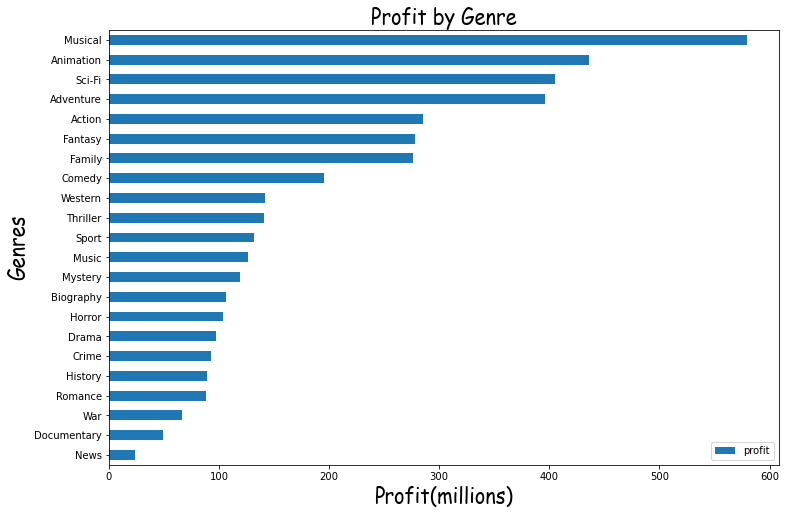

In [45]:
imdb_budgets_genres_by_profit = imdb_budgets_genres.groupby('genres')['profit'].mean().reset_index()
imdb_budgets_genres_by_profit = imdb_budgets_genres_by_profit.sort_values('profit')

imdb_budgets_genres_by_profit.plot(x='genres',y='profit',kind='barh',figsize=(12,8))
plt.xlabel('Profit(millions)',size=20,**csfont)
plt.ylabel('Genres',size=20,**csfont)
plt.title('Profit by Genre',size=20,**csfont)
plt.savefig('Profit_by_Genre.jpeg')



print('Earlier in the analysis, it was shown that the box office revenue was heavily favored towards science fiction and fantasy as well as action and adventure.\
However, when looking at the data for profit the spread is slightly different. Musicals appear to be the most profitable genres along with Scifi and animation\
 performing at a high rate. While not as strong as at the box office, action, fantasy, family and adventure also appear to be very profitable genres as well.')

## Advice for Microsoft

1) Keep the budget low!
For the budget, all the data points to a more reliable profit and return on investment. The correlation for budget vs profit
appears to be on the weaker side, so a larger budget doesn't necessarily mean a direct return on invesment. 

2) Best Genres for revenue: Action and Adventure, Science Fiction and Fantasy
   Best Genres for profit: Musicals, SciFi, Animation, Adventure
   examples - Avatar, Avengers, 
   
3) Summer time!
With consideration of the summer months being the most profitable, and June showing to be the highest month for return on investment, it makes sense to try and maxmimize movies released during that time. 

## Conclusion

## Big Takeaways
- Time of year is clear on the best times for movies
- Applying to the masses matters according to movie rating.
- Sci-Fi, Animated and Kids movies:
- Genres are generally in these rating brackets, meaning they apply to the masses, which leads higher revenue.


## Limitations
- Movie Rating and popularity:
- No clear outcome from study.
- Only three sources were used for study:
- More resources used could lead to more   reliable recommendations.


## Future Work

## Next Steps
Observe more parameters to look deeper into features that make for successful movie production. 

Possible Parameters:
- Demographic of viewer
- Region or Country
- Runtime
- Directors
- Actors

